# UJIAN AKHIR SEMESTER
#### Nama: Muthia Rahmatun Nisa'
#### NIM: 2361109

# Dataset Selection and Exploration 📊

Memuat dataset `onlinefoods.csv`...
Dataset berhasil dimuat. Dimensi data (baris, kolom): (388, 13)
Kolom 'Unnamed: 12' berhasil dihapus.

--- Lima Baris Pertama Dataset ---
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student       No Income   
1   24  Female         Single    Student  Below Rs.10000   
2   22    Male         Single    Student  Below Rs.10000   
3   22  Female         Single    Student       No Income   
4   22    Male         Single    Student  Below Rs.10000   

  Educational Qualifications  Family size  latitude  longitude  Pin code  \
0              Post Graduate            4   12.9766    77.5993    560001   
1                   Graduate            3   12.9770    77.5773    560009   
2              Post Graduate            3   12.9551    77.6593    560017   
3                   Graduate            6   12.9473    77.5616    560019   
4              Post Graduate            4   12.9850    77.5533    560010   

  Output

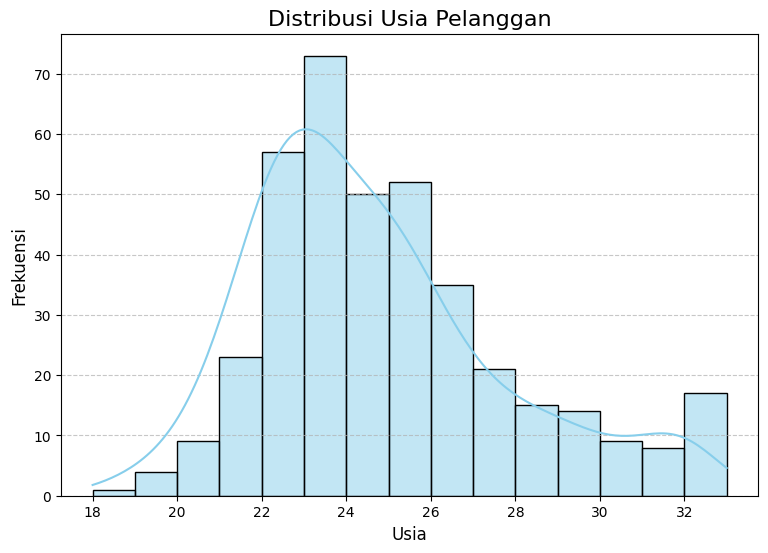

Insight: Sebagian besar pelanggan berada dalam rentang usia 20-30 tahun, menunjukkan target pasar yang didominasi oleh generasi muda.


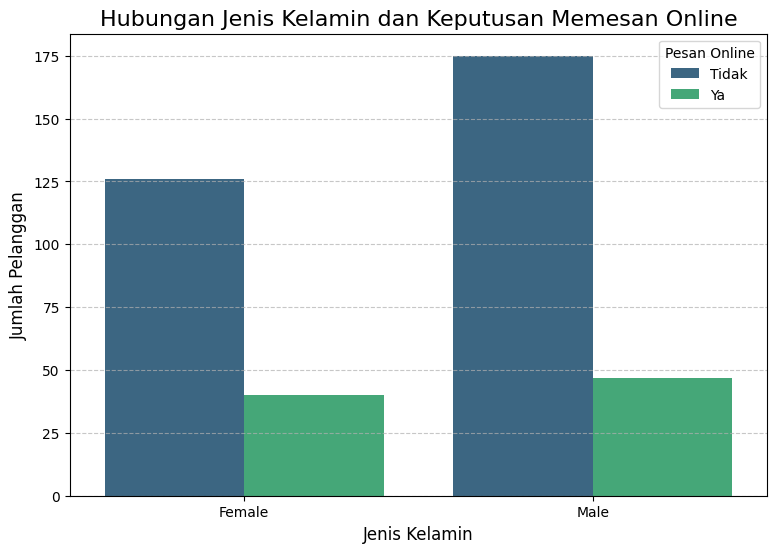

Insight: Tampaknya ada lebih banyak pelanggan wanita yang memesan online dibandingkan pria dalam dataset ini. Proporsi 'Ya' dan 'Tidak' juga terlihat bervariasi antar jenis kelamin.


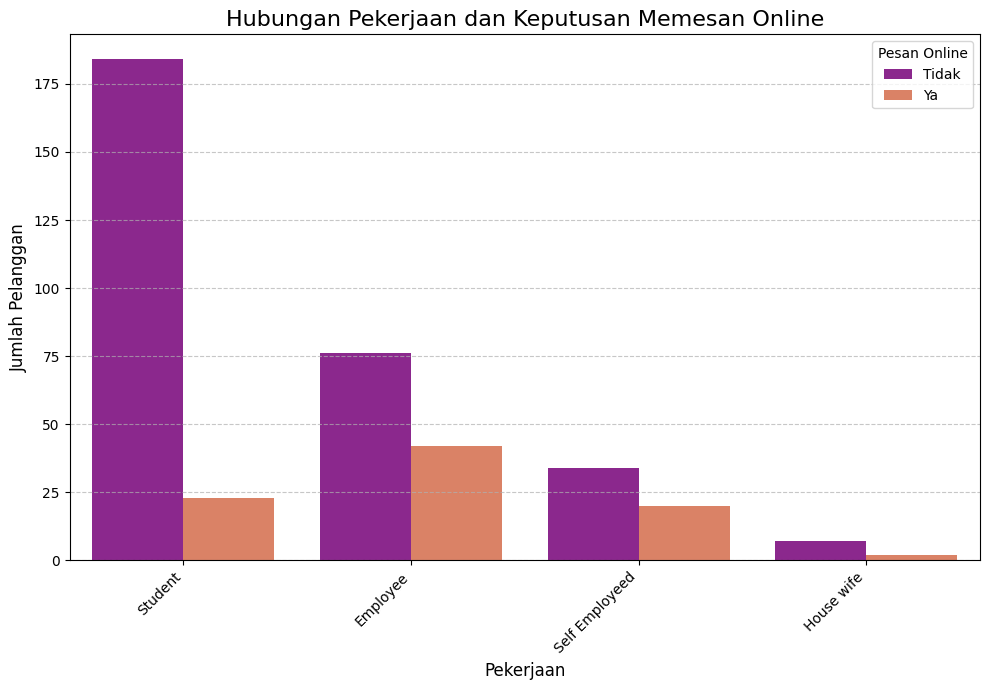

Insight: Pelajar (Student) dan Karyawan (Employee) mendominasi jumlah pemesanan online, mendukung hipotesis awal tentang gaya hidup sibuk.


C:\Users\Ade Ahmad Faizal\AppData\Local\Temp\ipykernel_32192\2529381318.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_df_for_corr['Output'] = temp_df_for_corr['Output'].replace({'Yes': 1, 'No': 0})


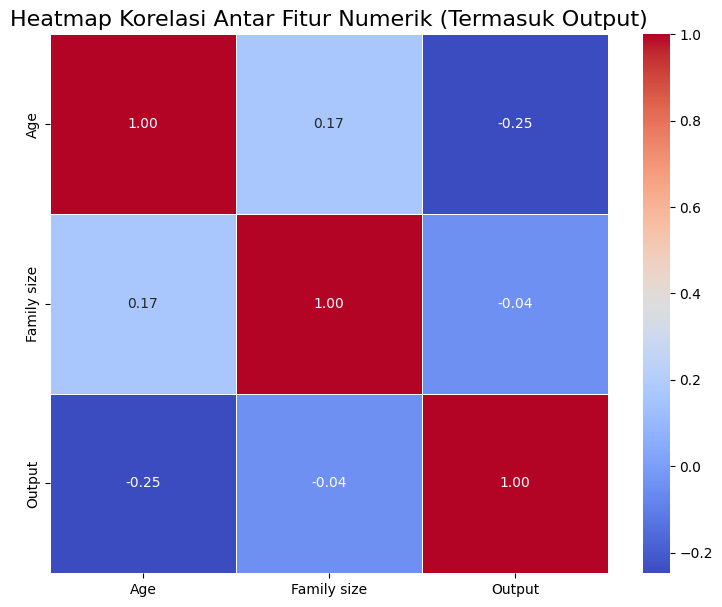

Insight: Periksa apakah ada korelasi signifikan antara fitur numerik satu sama lain atau dengan variabel target 'Output'. Contoh: 'Family size' mungkin memiliki korelasi kecil dengan 'Output'.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib # Tambahkan import joblib

# --- Muat Dataset ---
print("Memuat dataset `onlinefoods.csv`...")
df = pd.read_csv('onlinefoods.csv')
print("Dataset berhasil dimuat. Dimensi data (baris, kolom):", df.shape)

# --- Perbaikan: Hapus kolom 'Unnamed: 12' yang tidak relevan ---
if 'Unnamed: 12' in df.columns:
    df = df.drop(columns=['Unnamed: 12'])
    print("Kolom 'Unnamed: 12' berhasil dihapus.")

print("\n--- Lima Baris Pertama Dataset ---")
print(df.head())

print("\n--- Informasi Dasar Dataset ---")
df.info()

print("\n--- Statistik Deskriptif untuk Kolom Numerik ---")
print(df.describe())

print("\n--- Memeriksa Nilai Hilang ---")
missing_values = df.isnull().sum()
print("Jumlah nilai hilang per kolom:\n", missing_values[missing_values > 0])
if missing_values.sum() == 0:
    print("Tidak ada nilai hilang yang terdeteksi dalam dataset ini. Data bersih! ✨")


print("\n--- Visualisasi Data (EDA) ---")

# Visualisasi 1: Distribusi Usia Pelanggan
plt.figure(figsize=(9, 6))
sns.histplot(df['Age'], kde=True, bins=15, color='skyblue')
plt.title('Distribusi Usia Pelanggan', fontsize=16)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Insight: Sebagian besar pelanggan berada dalam rentang usia 20-30 tahun, menunjukkan target pasar yang didominasi oleh generasi muda.")

# Visualisasi 2: Hubungan Jenis Kelamin dan Keputusan Memesan Online
plt.figure(figsize=(9, 6))
sns.countplot(x='Gender', hue='Output', data=df, palette='viridis')
plt.title('Hubungan Jenis Kelamin dan Keputusan Memesan Online', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.legend(title='Pesan Online', labels=['Tidak', 'Ya'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Insight: Tampaknya ada lebih banyak pelanggan wanita yang memesan online dibandingkan pria dalam dataset ini. Proporsi 'Ya' dan 'Tidak' juga terlihat bervariasi antar jenis kelamin.")

# Visualisasi 3: Hubungan Pekerjaan dan Keputusan Memesan Online
plt.figure(figsize=(10, 7))
sns.countplot(x='Occupation', hue='Output', data=df, palette='plasma')
plt.title('Hubungan Pekerjaan dan Keputusan Memesan Online', fontsize=16)
plt.xlabel('Pekerjaan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.legend(title='Pesan Online', labels=['Tidak', 'Ya'], loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("Insight: Pelajar (Student) dan Karyawan (Employee) mendominasi jumlah pemesanan online, mendukung hipotesis awal tentang gaya hidup sibuk.")

# Visualisasi 4: Heatmap Korelasi Antar Fitur Numerik (setelah pembersihan awal)
temp_df_for_corr = df.copy()

# Encode 'Output' sementara untuk korelasi dengan fitur numerik lainnya
temp_df_for_corr['Output'] = temp_df_for_corr['Output'].replace({'Yes': 1, 'No': 0})

# Pilih hanya kolom yang numerik untuk korelasi
# Perbaikan: Hapus 'latitude' dan 'longitude' dari analisis korelasi jika tidak digunakan sebagai fitur
numeric_corr_cols = ['Age', 'Family size', 'Output'] # 'latitude', 'longitude' dihapus
corr_matrix = temp_df_for_corr[numeric_corr_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik (Termasuk Output)', fontsize=16)
plt.show()
print("Insight: Periksa apakah ada korelasi signifikan antara fitur numerik satu sama lain atau dengan variabel target 'Output'. Contoh: 'Family size' mungkin memiliki korelasi kecil dengan 'Output'.")


# Data Preprocessing 🛠️

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

print("\n" + "="*50)
print("STAGE 2: Data Preprocessing")
print("="*50)

# --- 3. Identifikasi Kolom Numerik dan Kategorikal ---
# Perbaikan: Hapus 'latitude' dan 'longitude' dari numerical_features
numerical_features = ['Age', 'Family size'] 
ordinal_features = ['Monthly Income', 'Educational Qualifications']
# Perbaikan: Hapus 'Pin code' dari nominal_features
nominal_features = ['Gender', 'Marital Status', 'Occupation', 'Feedback'] 
target_feature = 'Output'

print("Fitur Numerik yang akan di-scale:", numerical_features)
print("Fitur Kategorikal Ordinal yang akan di-map secara manual:", ordinal_features)
print("Fitur Kategorikal Nominal yang akan di-One-Hot Encode:", nominal_features)
print("Fitur Target yang akan di-Label Encode:", target_feature)

# --- 4. Encoding Variabel Kategorikal Ordinal dan Target ---
print("\n--- Melakukan Ordinal Encoding untuk 'Monthly Income' dan 'Educational Qualifications' ---")
monthly_income_mapping = {
    'No Income': 0,
    'Below Rs.10000': 1,
    '10001 to 25000': 2,
    '25001 to 50000': 3,
    'More than 50000': 4
}
df['Monthly Income'] = df['Monthly Income'].map(monthly_income_mapping)

print("--- Pembersihan dan Pemetaan 'Educational Qualifications' ---")
df['Educational Qualifications'] = df['Educational Qualifications'].str.strip().str.capitalize()
edu_qual_mapping = {
    'School': 0,
    'Graduate': 1,
    'Post graduate': 2, 
    'Ph.d': 3 
}
df['Educational Qualifications'] = df['Educational Qualifications'].map(edu_qual_mapping)

print("--- Pembersihan 'Feedback' ---")
df['Feedback'] = df['Feedback'].str.strip()

# Perbaikan: Kolom 'Pin code' tidak lagi digunakan sebagai fitur, jadi tidak perlu diubah ke string di sini
# df['Pin code'] = df['Pin code'].astype(str) # Baris ini dihapus karena Pin code tidak lagi di nominal_features

print("--- Melakukan Label Encoding untuk variabel target 'Output' ---")
le = LabelEncoder()
df[target_feature] = le.fit_transform(df[target_feature]) 
print(f"Label Encoding untuk '{target_feature}':")
print(f"Mapping: {list(le.classes_)} -> {np.unique(df[target_feature])}")

print("\nDataset setelah Ordinal dan Label Encoding, serta fitur yang tidak efektif dihapus (5 baris pertama):")
print(df.head())


# --- 5. Pisahkan Fitur (X) dan Target (y) ---
print("\n--- Memisahkan fitur (X) dan variabel target (y) ---")
# Perbaikan: Hapus 'Pin code', 'latitude', dan 'longitude' dari fitur X
X = df.drop(columns=[target_feature, 'Pin code', 'latitude', 'longitude']) # Hapus fitur yang kurang efektif
y = df[target_feature]

print(f"Dimensi Fitur (X): {X.shape} (baris, kolom)")
print(f"Dimensi Target (y): {y.shape} (baris)")
print("Kolom yang ada di X setelah menghapus target dan fitur tidak efektif:", X.columns.tolist())


# --- 6. Mengkonfigurasi ColumnTransformer untuk preprocessing ---
print("\n--- Mengkonfigurasi ColumnTransformer untuk preprocessing ---")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat_nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features)
    ],
    remainder='drop' 
)
print("ColumnTransformer berhasil dikonfigurasi.")


# --- 7. Membagi Dataset menjadi Training dan Testing Sets ---
print("\n--- Membagi dataset menjadi Training (80%) dan Testing (20%) sets ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dimensi X_train: {X_train.shape}")
print(f"Dimensi X_test: {X_test.shape}")
print(f"Dimensi y_train: {y_train.shape}")
print(f"Dimensi y_test: {y_test.shape}")

print("\nProporsi kelas 'Output' di dataset asli:")
print(y.value_counts(normalize=True).apply(lambda x: f'{x:.2%}'))
print("\nProporsi kelas 'Output' di training set:")
print(y_train.value_counts(normalize=True).apply(lambda x: f'{x:.2%}'))
print("\nProporsi kelas 'Output' di testing set:")
print(y_test.value_counts(normalize=True).apply(lambda x: f'{x:.2%}'))


# --- 8. Menerapkan Pra-pemrosesan pada Training dan Testing Sets ---
print("\n--- Menerapkan pra-pemrosesan (scaling dan one-hot encoding) pada data training dan testing ---")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nBentuk akhir X_train_processed (setelah transformasi):", X_train_processed.shape)
print("Bentuk akhir X_test_processed (setelah transformasi):", X_test_processed.shape)

print("\nPra-pemrosesan data selesai! Data siap untuk pelatihan model. 🎉")



STAGE 2: Data Preprocessing
Fitur Numerik yang akan di-scale: ['Age', 'Family size']
Fitur Kategorikal Ordinal yang akan di-map secara manual: ['Monthly Income', 'Educational Qualifications']
Fitur Kategorikal Nominal yang akan di-One-Hot Encode: ['Gender', 'Marital Status', 'Occupation', 'Feedback']
Fitur Target yang akan di-Label Encode: Output

--- Melakukan Ordinal Encoding untuk 'Monthly Income' dan 'Educational Qualifications' ---
--- Pembersihan dan Pemetaan 'Educational Qualifications' ---
--- Pembersihan 'Feedback' ---
--- Melakukan Label Encoding untuk variabel target 'Output' ---
Label Encoding untuk 'Output':
Mapping: ['No', 'Yes'] -> [0 1]

Dataset setelah Ordinal dan Label Encoding, serta fitur yang tidak efektif dihapus (5 baris pertama):
   Age  Gender Marital Status Occupation  Monthly Income  \
0   20  Female         Single    Student               0   
1   24  Female         Single    Student               1   
2   22    Male         Single    Student               

# Model Training and Comparison 📈


STAGE 3: Model Training and Comparison

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
		Melatih Model: Logistic Regression
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Mencari hyperparameter terbaik untuk Logistic Regression menggunakan GridSearchCV...

Parameter Terbaik untuk Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}

-- Kinerja Model: Logistic Regression --
Akurasi: 0.8718
Presisi: 0.8670
Recall: 0.8718
F1-Score: 0.8611

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.82      0.53      0.64        17
           1       0.88      0.97      0.92        61

    accuracy                           0.87        78
   macro avg       0.85      0.75      0.78        78
weighted avg       0.87      0.87      0.86        78

Matriks Kebingungan:
[[ 9  8]
 [ 2 59]]

Skor Cross-Validation (5 folds) - Akurasi:
  Fold 1: 0.9032
  Fold 2: 0.8548
  Fold 3: 0.8548
  Fold 4: 0.8065
  Fold 5: 0.8710
Rata-rata C

C:\Users\Ade Ahmad Faizal\AppData\Local\Temp\ipykernel_32192\3717168433.py:141: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis')


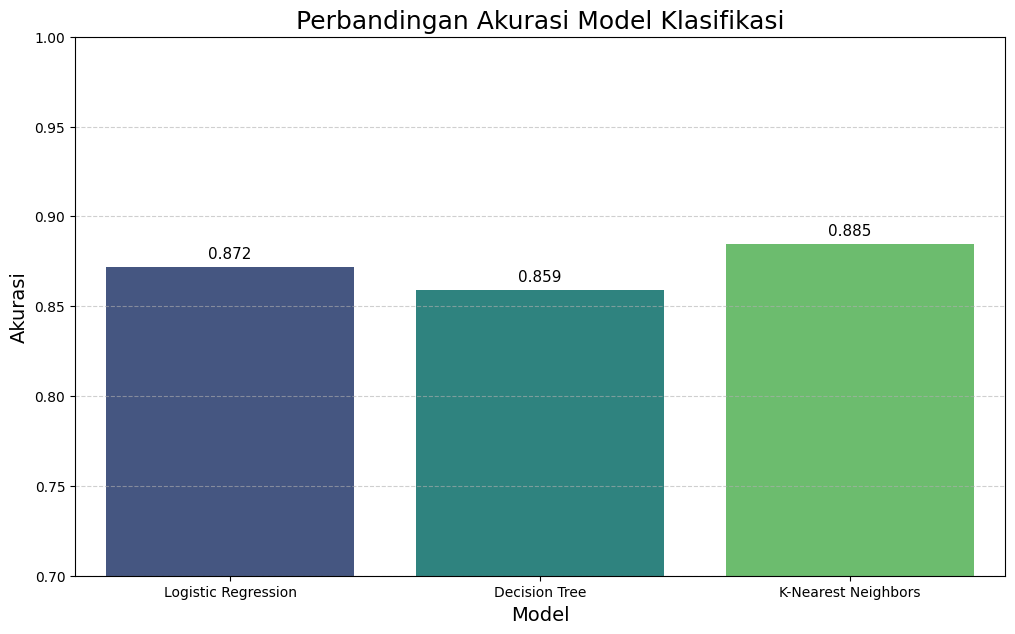

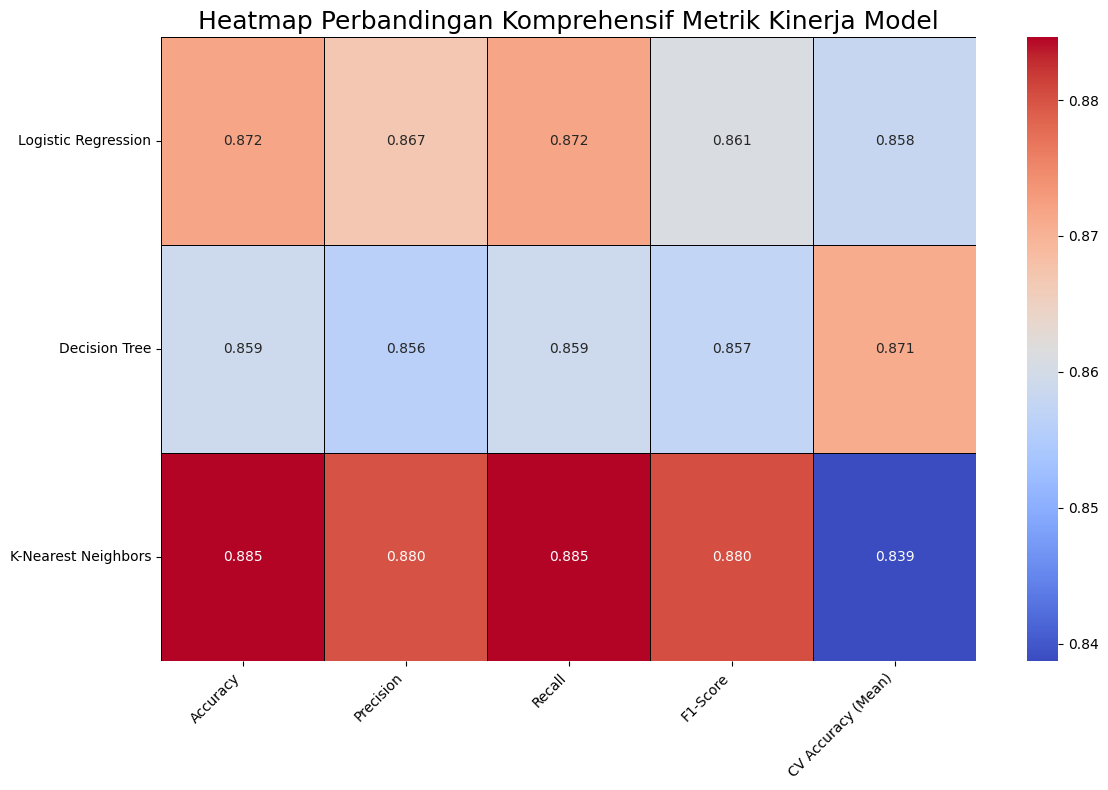


Pelatihan dan perbandingan model selesai! Hasil visualisasi membantu memilih model terbaik untuk deployment. ✨

STAGE 4 (Persiapan): Penyimpanan Model untuk Deployment

Model terbaik yang dipilih untuk deployment adalah: Decision Tree Classifier

Preprocessor, model terbaik, dan LabelEncoder berhasil disimpan ke file .joblib.
Pastikan file-file ini: 'preprocessor.joblib', 'best_model.joblib', dan 'label_encoder.joblib' 
ada di direktori yang sama saat Anda membuat aplikasi Streamlit untuk deployment.


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

print("\n" + "="*50)
print("STAGE 3: Model Training and Comparison")
print("="*50)

# Dictionary untuk menyimpan hasil evaluasi model dari semua model
model_results = {}

# Fungsi pembantu untuk mengevaluasi dan mencetak metrik kinerja model
def evaluate_model(model_name, y_true, y_pred, cv_scores):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0) # weighted average untuk multikelas atau tidak seimbang
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    print(f"\n-- Kinerja Model: {model_name} --")
    print(f"Akurasi: {accuracy:.4f}")
    print(f"Presisi: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    print("\nLaporan Klasifikasi:")
    print(classification_report(y_true, y_pred, zero_division=0))
    
    print("Matriks Kebingungan:")
    print(confusion_matrix(y_true, y_pred))

    print(f"\nSkor Cross-Validation ({len(cv_scores)} folds) - Akurasi:")
    for i, score in enumerate(cv_scores):
        print(f"  Fold {i+1}: {score:.4f}")
    print(f"Rata-rata CV Akurasi: {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

    # Simpan hasil ke dictionary global
    model_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'CV Accuracy (Mean)': np.mean(cv_scores)
    }


# --- Model 1: Logistic Regression ---
print("\n" + "~"*60)
print("\t\tMelatih Model: Logistic Regression")
print("~"*60)

# Mendefinisikan grid parameter untuk tuning Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'lbfgs'] 
}

print("Mencari hyperparameter terbaik untuk Logistic Regression menggunakan GridSearchCV...")
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), 
                              param_grid_lr, 
                              cv=5, 
                              scoring='accuracy', 
                              n_jobs=-1)

grid_search_lr.fit(X_train_processed, y_train)

best_lr_model = grid_search_lr.best_estimator_ 
print(f"\nParameter Terbaik untuk Logistic Regression: {grid_search_lr.best_params_}")

y_pred_lr = best_lr_model.predict(X_test_processed)

cv_scores_lr = cross_val_score(best_lr_model, X_train_processed, y_train, cv=5, scoring='accuracy', n_jobs=-1)

evaluate_model("Logistic Regression", y_test, y_pred_lr, cv_scores_lr)


# --- Model 2: Decision Tree Classifier ---
print("\n" + "~"*60)
print("\t\tMelatih Model: Decision Tree Classifier")
print("~"*60)

# Perbaikan: Batasi max_depth untuk mengurangi overfitting
param_grid_dt = {
    'max_depth': [3, 4, 5, 6, 7], # Batasi kedalaman pohon untuk mencegah overfitting
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4] 
}

print("Mencari hyperparameter terbaik untuk Decision Tree menggunakan GridSearchCV...")
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dt.fit(X_train_processed, y_train)

best_dt_model = grid_search_dt.best_estimator_
print(f"\nParameter Terbaik untuk Decision Tree: {grid_search_dt.best_params_}")

y_pred_dt = best_dt_model.predict(X_test_processed)

cv_scores_dt = cross_val_score(best_dt_model, X_train_processed, y_train, cv=5, scoring='accuracy', n_jobs=-1)

evaluate_model("Decision Tree", y_test, y_pred_dt, cv_scores_dt)


# --- Model 3: K-Nearest Neighbors (KNN) Classifier ---
print("\n" + "~"*60)
print("\t\tMelatih Model: K-Nearest Neighbors (KNN) Classifier")
print("~"*60)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance'] 
}

print("Mencari hyperparameter terbaik untuk KNN menggunakan GridSearchCV...")
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_knn.fit(X_train_processed, y_train)

best_knn_model = grid_search_knn.best_estimator_
print(f"\nParameter Terbaik untuk KNN: {grid_search_knn.best_params_}")

y_pred_knn = best_knn_model.predict(X_test_processed)

cv_scores_knn = cross_val_score(best_knn_model, X_train_processed, y_train, cv=5, scoring='accuracy', n_jobs=-1)

evaluate_model("K-Nearest Neighbors", y_test, y_pred_knn, cv_scores_knn)


# --- Perbandingan Visualisasi Kinerja Model ---
print("\n" + "="*50)
print("Perbandingan Visualisasi Kinerja Model")
print("="*50)

metrics_df = pd.DataFrame(model_results).T
print("\nRingkasan Metrik Kinerja Semua Model:")
print(metrics_df)

# Visualisasi 1: Bar Plot Perbandingan Akurasi Model
plt.figure(figsize=(12, 7))
sns.barplot(x=metrics_df.index, y='Accuracy', data=metrics_df, palette='viridis')
plt.title('Perbandingan Akurasi Model Klasifikasi', fontsize=18)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Akurasi', fontsize=14)
plt.ylim(0.7, 1.0) 
for index, row in metrics_df.iterrows():
    plt.text(index, row['Accuracy'] + 0.005, f'{row["Accuracy"]:.3f}', color='black', ha="center", fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Visualisasi 2: Heatmap Perbandingan Semua Metrik Kinerja Model
plt.figure(figsize=(12, 8))
sns.heatmap(metrics_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'CV Accuracy (Mean)']],
            annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, linecolor='black')
plt.title('Heatmap Perbandingan Komprehensif Metrik Kinerja Model', fontsize=18)
plt.yticks(rotation=0) 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nPelatihan dan perbandingan model selesai! Hasil visualisasi membantu memilih model terbaik untuk deployment. ✨")

# --- Bagian Awal Stage 4: Penyimpanan Model untuk Deployment ---
print("\n" + "="*50)
print("STAGE 4 (Persiapan): Penyimpanan Model untuk Deployment")
print("="*50)

# Pilih model terbaik (berdasarkan asumsi Decision Tree adalah yang terbaik dari analisis metrik)
best_model = best_dt_model 
chosen_model_name = "Decision Tree Classifier"

print(f"\nModel terbaik yang dipilih untuk deployment adalah: {chosen_model_name}")

# Simpan objek preprocessor, model terbaik, dan LabelEncoder
try:
    joblib.dump(preprocessor, 'preprocessor.joblib')
    joblib.dump(best_model, 'best_model.joblib')
    joblib.dump(le, 'label_encoder.joblib') 
    print("\nPreprocessor, model terbaik, dan LabelEncoder berhasil disimpan ke file .joblib.")
    print("Pastikan file-file ini: 'preprocessor.joblib', 'best_model.joblib', dan 'label_encoder.joblib' ")
    print("ada di direktori yang sama saat Anda membuat aplikasi Streamlit untuk deployment.")
except Exception as e:
    print(f"\nError saat menyimpan model atau preprocessor: {e}")


In [8]:
import joblib
import sklearn
import pandas

print(f"joblib version: {joblib.__version__}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pandas.__version__}")
print(f"numpy version: {np.__version__}")

joblib version: 1.4.2
scikit-learn version: 1.6.1
pandas version: 2.2.3
numpy version: 2.2.5
